# Exercise 6.1: Solutions to transcendental equations - Exercise 1.2 continued!

This is a continuation of Exercise 1.2, where you were asked to graph the right- and left-hand side of the odd/even solutions to the transcendetal equations that appear in the 1-D finite square well:

The two *transcendental* equations that you were asked to graph were:

$$
\tan(z) = \sqrt{ \frac{z_0^2}{z^2} - 1}~~~~\text{(even wave functions)}
$$

$$
-\cot(z) = \sqrt{ \frac{z_0^2}{z^2} - 1}~~~~\text{(odd wave functions)}
$$

You may use your own solution of Exercise 1.2 or the posted solution as a basis to this problem. 

Use your graph to *calculate and plot* the solutions to the above transcendetal equations for: $z_0 = 1, 8, 16$. 

You may use either the bisection method or the Newton-Raphson method (or both!) to find the solutions. *Do not use the builtin Python functions!*


## Solution

I decided to implement the bisection algorithm rather than Newton-Raphson, for it is certainly less likely to give errors. This is achieved below.

In [53]:
import numpy as np
from functools import partial

def bisect(func,a,b,prec,N): # searches for a root of func on the interval [a,b] via the midpoint method, and returns the root within precision prec; runs through N iterations
    left = a # left end of interval for which the root is searched; initially a
    right = b # right end of interval for which the root is searched; initially b
    mid = (a+b)/2 # the midpoint of the interval for which the root is searched; initially set as the midpoint of [a,b]
    count = 0 # counts the number of iterations
    while abs(func(mid)) > prec and count < N:
        if np.sign(func(left)) != np.sign(func(mid)): # chooses a new interval to search according to where the function values change sign
            left = left
            right = mid
            mid = (left+right)/2
        else:
            left = mid
            right = right
            mid = (left+right)/2
        count = count + 1
    return mid

Below is code that generates plots of the LHS and RHS of the transcendental equations for the finite square well, as I wrote in exercise 1.2.

The plots are for $z_0=1,8,16$, repectively.

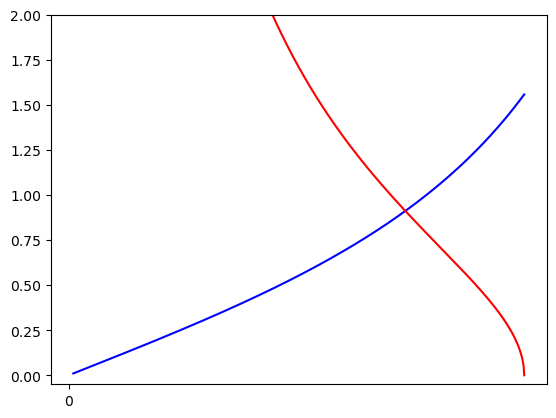

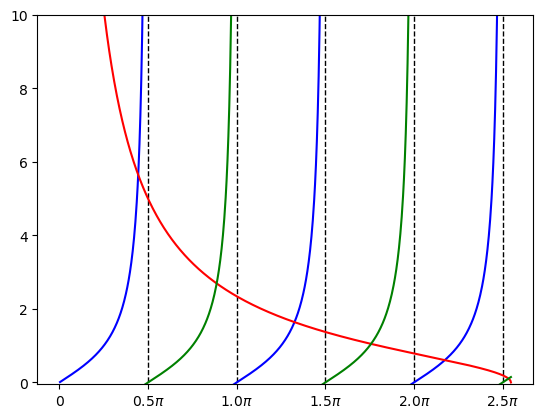

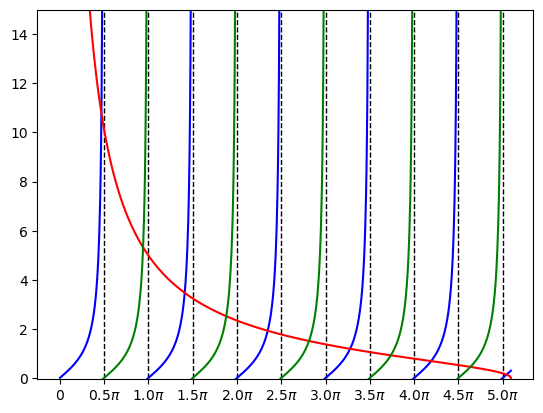

In [50]:
from matplotlib import pyplot as plt
from math import pi

def trans(z0,u): # Transcendental functions for even eigenstates are in blue and odd states in green.
    """Creates a plot of both sides of the transcendental equations for the eigenvalues of the finite square well
    Hamiltonian with well depth corresponding to z0 (see Griffiths) with vertical axis plotted up to u."""
    z = np.linspace(.01,z0,1000) # Partition of the z space. Starts from .01 to avoid division by zero.
    a = np.tan(z)
    b = np.sqrt(z0**2/z**2-1) # a,b,c define the transcendental functions
    c = -1/np.tan(z)
    
    a[:-1][np.diff(a) < 0] = np.nan # Removes vertical lines from plot by identifying points for which increments in tangent values are negative
    c[:-1][np.diff(c) < 0] = np.nan
    
    fig, axes = plt.subplots() # creates the plot axes
    axes.set_ylim(-.05,u) # sets the range of displayed values on the vertical axis
    
    # Creates the ticks and lables at every integer multiple of pi/2
    n=pi/2 # keeps track of tick position
    m=1/2 # keeps track of the multiple of pi/2 corresponding to each tick
    ticks=[0] # set of ticks
    lables=[0] # set of tick lables
    while n < z0: # fills the tick and lable sets with as many as can fit according to z0
        axes.vlines(x=n, ymin=0, ymax=u, linewidth=1, ls='--', color='black')
        ticks.append(n)
        lables.append(str(m)+'$\\pi$')
        n = n+pi/2
        m += 1/2
        
    axes.set_xticks(ticks)
    axes.set_xticklabels(lables)
    
    axes.plot(z, a, color='blue') 
    axes.plot(z, b, color='red') # Plots the graphs
    axes.plot(z, c, color='green')
    
trans(1,2)
trans(8,10)
trans(16,15)

Using the above plots as a guide, we can use ```bisect``` to find the intersection points.

In [ ]:
def energyE(z0,z): # roots are the energy eigenvalues corresponding to even states
    return np.tan(z)-np.sqrt(z0**2/z**2-1)

def energyO(z0,z): # roots are the energy eigenvalues corresponding to odd states
    return np.cot(z)+np.sqrt(z0**2/z**2-1)

bisect(partial(energyE,1),.01,pi/2,1E-10,10000)